In [ ]:
#PROJECT 1

#No questions sorry!

In [2]:
import numpy as np
from scipy.sparse import diags

rows = int(input("Enter no of rows: "))
cols = int(input("Enter no of columns: "))

A = []
print("Enter the elements:")
for i in range(rows):
    row = [int(input()) for _ in range(cols)]
    A.append(row)

print("\nMatrix A:\n", A)

B = [5, 8, 9]
C = A + [B]  

print("\nMatrix C:\n", C)

D = [row[2:4] for row in C[1:4]]
print("\nMatrix D:\n", D)

E = [[row[i] for row in A] for i in range(len(A[0]))]  # Fix: Used A instead of 'matrix'
print("\nMatrix E (Transpose of A):\n", E)

print("\nLength of A:", len(A))
print("Length of E:", len(E))

vector = np.linspace(0, 10, 5) 
print("\nEqually spaced vector:", vector)

row_max = np.max(A, axis=1)
col_max = np.max(A, axis=0)
row_min = np.min(A, axis=1)
col_min = np.min(A, axis=0)

print("\nMin of rows:", row_min)
print("Max of rows:", row_max)
print("Min of columns:", col_min)
print("Max of columns:", col_max)

row_sum = np.sum(A, axis=1)
col_sum = np.sum(A, axis=0)
row_mean = np.mean(A, axis=1)
col_mean = np.mean(A, axis=0)

print("\nSum of rows:", row_sum)
print("Sum of columns:", col_sum)
print("\nMean of rows:", row_mean)
print("Mean of columns:", col_mean)

F = np.random.random((3, 3))  
G = np.random.random((3, 3))

print("\nMatrix F:\n", F)
print("\nMatrix G:\n", G)

scalarMul = 2 * F
add = F + G
sub = F - G
mul = F * G 

print("\nF * 2:\n", scalarMul)
print("\nF + G:\n", add)
print("\nF - G:\n", sub)
print("\nF * G (Element-wise Multiplication):\n", mul)

if A and len(A[0]) == F.shape[0]: 
    matMul = np.dot(A, F)
    print("\nMatrix Multiplication (A @ F):\n", matMul)
else:
    print("\nMatrix multiplication is not possible due to incompatible dimensions.")

I = np.eye(3)
Z = np.zeros((5, 3))
O = np.ones((4, 2))
S = np.diag([1, 2, 7])

rand = np.random.random((6, 6))
diag_elements = np.diag(rand)

sparse_diag = diags([1, 2, 7], offsets=0).toarray()

print("\nIdentity Matrix:\n", I)
print("\nZero Matrix (5x3):\n", Z)
print("\nOne Matrix (4x2):\n", O)
print("\nDiagonal Matrix S:\n", S)
print("\nDiagonal Elements of Random 6x6 Matrix:\n", diag_elements)
print("\nSparse Diagonal Matrix (Converted to Dense):\n", sparse_diag)


ValueError: invalid literal for int() with base 10: ''

In [ ]:
#PROJECT 2

Image dimensions: (1200, 900)
Is integer array: True


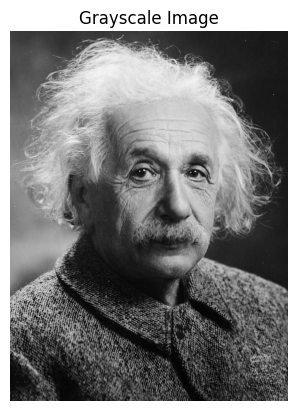

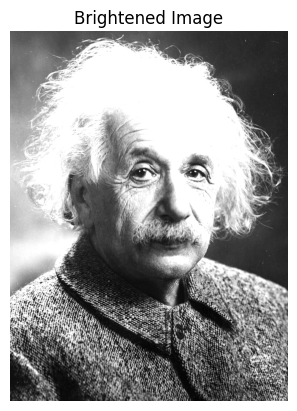

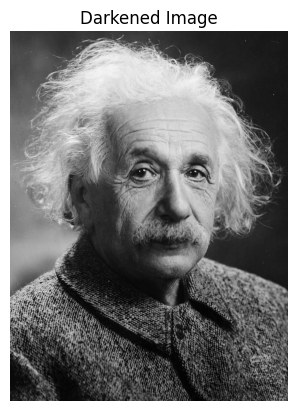

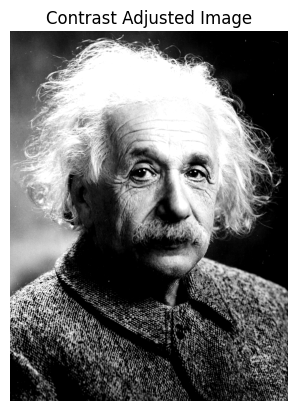

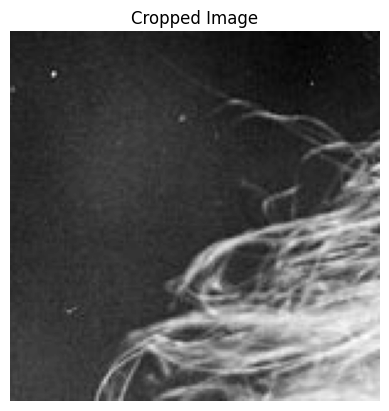

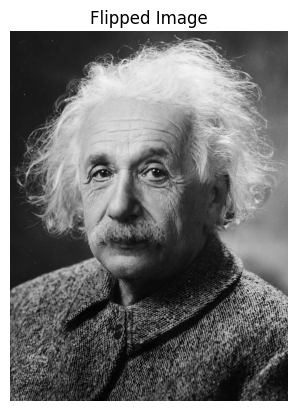

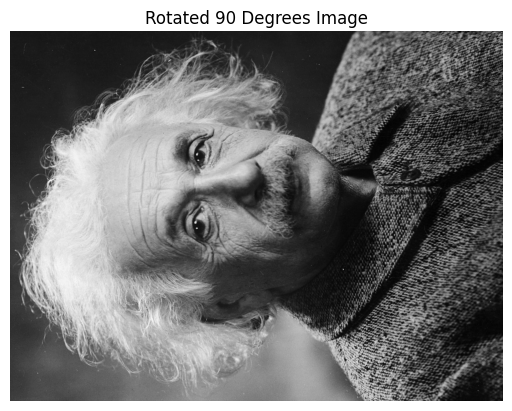

In [ ]:
import imageio.v3 as imageio
import numpy as np
import matplotlib.pyplot as plt

def load_image(filename):
    img = imageio.imread(filename)
    return img

def check_size(img):
    return img.shape
    
def is_integer(img):
    return np.issubdtype(img.dtype, np.integer)

def to_grayscale(img):
    if len(img.shape) == 3:
        return np.dot(img[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)
    return img

def adjust_brightness(img, factor):
    img = np.clip(img * factor, 0, 255)
    return img.astype(np.uint8)
    
def adjust_contrast(img, factor):
    mean = np.mean(img)
    img = np.clip((img - mean) * factor + mean, 0, 255)
    return img.astype(np.uint8)


def crop_image(img, x1, y1, x2, y2):
    return img[y1:y2, x1:x2]

# 8. Apply transformations (flip, rotate)
def flip_horizontal(img):
    return np.flip(img, axis=1)

def rotate_90(img):
    return np.rot90(img)

def display_image(img, title="Image"):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    filename = "einstein.jpg"
    img = load_image(filename)
    
    print("Image dimensions:", check_size(img))
    print("Is integer array:", is_integer(img))
    
    gray_img = to_grayscale(img)
    bright_img = adjust_brightness(gray_img, 1.5)
    dark_img = adjust_brightness(gray_img, 0.5)
    contrast_img = adjust_contrast(gray_img, 1.5)
    cropped_img = crop_image(gray_img, 50, 50, 200, 200)
    flipped_img = flip_horizontal(gray_img)
    rotated_img = rotate_90(gray_img)
    
    display_image(gray_img, "Grayscale Image")
    display_image(bright_img, "Brightened Image")
    display_image(dark_img, "Darkened Image")
    display_image(contrast_img, "Contrast Adjusted Image")
    display_image(cropped_img, "Cropped Image")
    display_image(flipped_img, "Flipped Image")
    display_image(rotated_img, "Rotated 90 Degrees Image")


In [ ]:
#PROJECT 3

Height: 1535, Width: 1200, Channels: 3


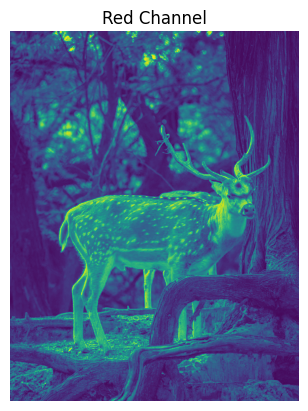

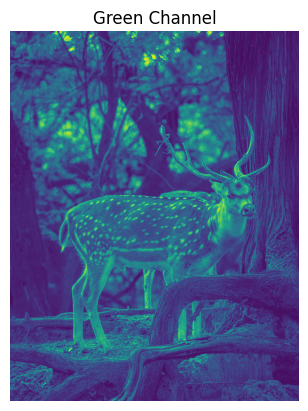

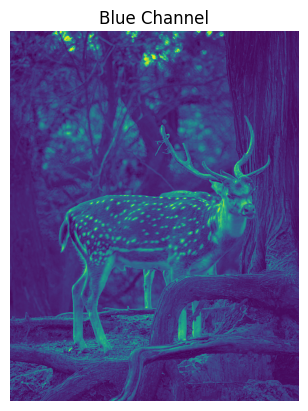

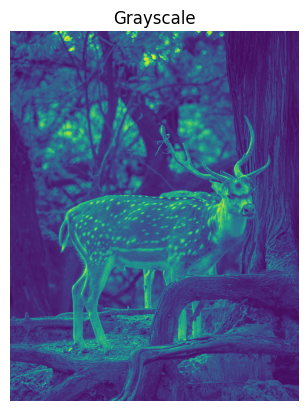

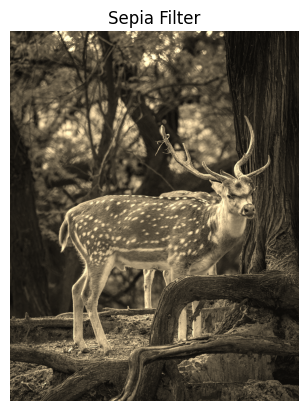

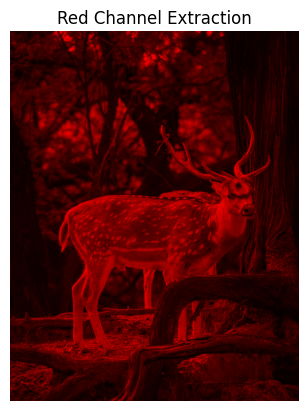

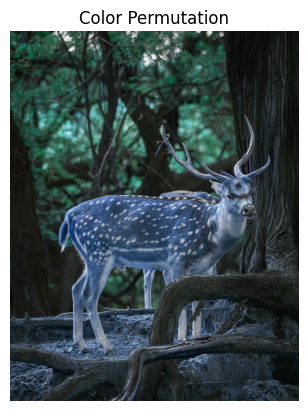

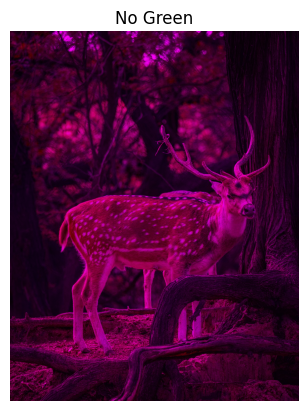

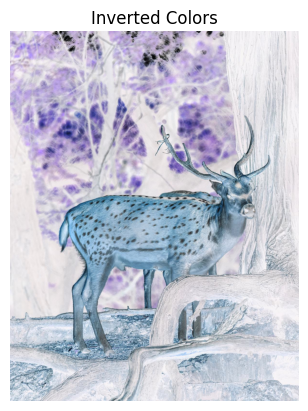

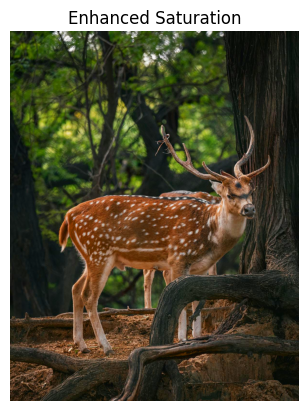

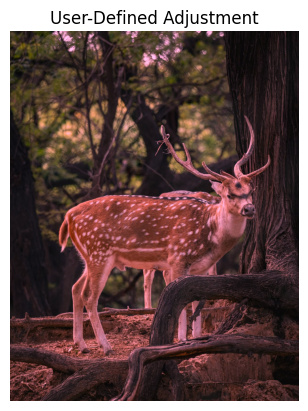

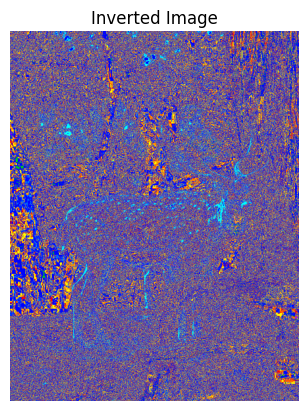

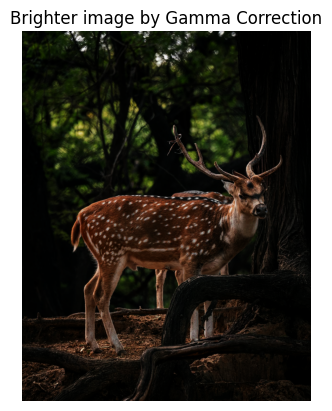

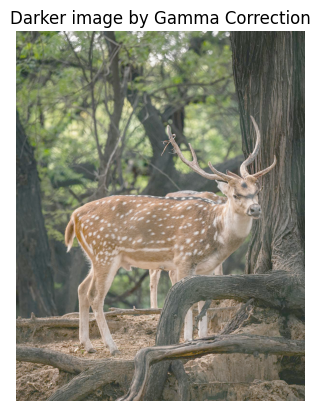

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    return image

def display_image(title, image):
    plt.imshow(image)
    plt.title(title)
    plt.axis("off")
    plt.show()

def extract_image_info(image):
    height, width, channels = image.shape
    print(f"Height: {height}, Width: {width}, Channels: {channels}")
    return height, width, channels

def extract_color_channels(image):
    R, G, B = cv2.split(image)
    return R, G, B

def grayscale_conversion(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return gray

def apply_sepia(image):
    sepia_filter = np.array([[0.393, 0.769, 0.189],
                             [0.349, 0.686, 0.168],
                             [0.272, 0.534, 0.131]])
    sepia_image = cv2.transform(image, sepia_filter)
    sepia_image = np.clip(sepia_image, 0, 255).astype(np.uint8)
    return sepia_image

def invert_sepia(image):
    sepia_matrix = np.array([[0.393, 0.769, 0.189],
                             [0.349, 0.686, 0.168],
                             [0.272, 0.534, 0.131]])
    try:
        inv_sepia_matrix = np.linalg.inv(sepia_matrix)
        restored_image = np.dot(image[..., :3], inv_sepia_matrix.T)
        return np.clip(restored_image, 0, 255).astype(np.uint8)
    except np.linalg.LinAlgError:
        print("Matrix inversion not possible (possible information loss).")
        return image

def red_channel_extraction(image):
    red_image = image.copy()
    red_image[:, :, 1] = 0  # Remove Green
    red_image[:, :, 2] = 0  # Remove Blue
    return red_image

def color_permutation(image):
    permuted_image = image[:, :, [2, 1, 0]]  # Swap Red and Blue
    return permuted_image

def remove_green(image):
    no_green = image.copy()
    no_green[:, :, 1] = 0  # Set Green to 0
    return no_green

def invert_colors(image):
    inverted_image = 255 - image
    return inverted_image

def modify_saturation(image, scale):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    hsv[:, :, 1] = np.clip(hsv[:, :, 1] * scale, 0, 255) 
    modified_image = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    return modified_image

def user_defined_adjustment(image, r_factor, g_factor, b_factor):
    adjusted = image.copy().astype(np.float32)
    adjusted[:, :, 0] *= r_factor  # Red adjustment
    adjusted[:, :, 1] *= g_factor  # Green adjustment
    adjusted[:, :, 2] *= b_factor  # Blue adjustment
    adjusted = np.clip(adjusted, 0, 255).astype(np.uint8)
    return adjusted
    
def gamma_correction(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in range(256)]).astype(np.uint8)
    return cv2.LUT(image, table)

image_path = 'deer.jpeg'
image = load_image(image_path)

extract_image_info(image)
R, G, B = extract_color_channels(image)
display_image("Red Channel", R)
display_image("Green Channel", G)
display_image("Blue Channel", B)

grayscale_img = grayscale_conversion(image)
display_image("Grayscale", grayscale_img)

sepia_img = apply_sepia(image)
display_image("Sepia Filter", sepia_img)

red_only_img = red_channel_extraction(image)
display_image("Red Channel Extraction", red_only_img)

permuted_img = color_permutation(image)
display_image("Color Permutation", permuted_img)

no_green_img = remove_green(image)
display_image("No Green", no_green_img)

inverted_img = invert_colors(image)
display_image("Inverted Colors", inverted_img)

saturated_img = modify_saturation(image, 1.5)
display_image("Enhanced Saturation", saturated_img)

adjusted_img = user_defined_adjustment(image, 1.2, 0.8, 1.0)
display_image("User-Defined Adjustment", adjusted_img)

inverted_img = invert_sepia(sepia_img)
display_image("Inverted Image", inverted_img)

gamma_bright = gamma_correction(image, gamma=0.5)  
gamma_dark = gamma_correction(image, gamma=2.0)
display_image("Brighter image by Gamma Correction", gamma_bright)
display_image("Darker image by Gamma Correction", gamma_dark)

In [ ]:
#PROJECT 4

In [ ]:
import numpy as np
import time
from scipy.linalg import lu, lstsq

A = np.array([[3, 2, -1], [2, -2, 4], [-1, 0.5, -1]])
b = np.array([1, -2, 0])

start = time.time()
x1 = np.linalg.solve(A, b)
time1 = time.time() - start

start = time.time()
P, L, U = lu(A)
y = np.linalg.solve(L, np.dot(P.T, b))  # Solve Ly = P.T * b
x2 = np.linalg.solve(U, y)  # Solve Ux = y
time2 = time.time() - start

start = time.time()
x3, _, _, _ = lstsq(A, b)
time3 = time.time() - start

start = time.time()
x4 = np.dot(np.linalg.inv(A), b) if A.shape[0] == A.shape[1] else np.dot(np.linalg.pinv(A), b)
time4 = time.time() - start

start = time.time()
augmented_matrix = np.column_stack((A, b))
rref = np.linalg.matrix_rank(A)
x5 = np.linalg.solve(A, b) if rref == A.shape[1] else np.dot(np.linalg.pinv(A), b)
time5 = time.time() - start

print("Solution using np.linalg.solve:", x1, "Time:", time1)
print("Solution using LU decomposition:", x2, "Time:", time2)
print("Solution using Least Squares:", x3, "Time:", time3)
print("Solution using Matrix Inversion:", x4, "Time:", time4)
print("Solution using RREF:", x5, "Time:", time5)


Solution using np.linalg.solve: [ 1. -2. -2.] Time: 0.002998828887939453
Solution using LU decomposition: [ 1. -2. -2.] Time: 0.0010025501251220703
Solution using Least Squares: [ 1. -2. -2.] Time: 0.00600743293762207
Solution using Matrix Inversion: [ 1. -2. -2.] Time: 0.0010018348693847656
Solution using RREF: [ 1. -2. -2.] Time: 0.0039980411529541016


In [ ]:
#PROJECT 5

In [ ]:
import numpy as np

def gaussian_elimination(A, b):
    n = len(b)
    for i in range(n):
        max_row = max(range(i, n), key=lambda r: abs(A[r][i]))
        A[[i, max_row]] = A[[max_row, i]]
        b[i], b[max_row] = b[max_row], b[i]
        A[i] = A[i] / A[i][i]
        b[i] = b[i] / A[i][i]
        
        for j in range(i+1, n):
            factor = A[j][i]
            A[j] -= factor * A[i]
            b[j] -= factor * b[i]
    
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = b[i] - np.dot(A[i][i+1:], x[i+1:])
    
    min_value = min(x)
    if min_value < 0:
        x += abs(min_value) 
    
    return x

teams = ["Team1", "Team2", "Team3", "Team4", "Team5", "Team6", "Team7", "Team8", "Team9", "Team10"]
A = np.array([[4, -1, -1, -1, -1, 0, 0, 0, 0, 0],
              [-1, 5, -1, -1, -1, -1, 0, 0, 0, 0],
              [-1, -1, 6, -1, -1, -1, -1, 0, 0, 0],
              [-1, -1, -1, 5, -1, -1, -1, -1, 0, 0],
              [-1, -1, -1, -1, 4, -1, -1, -1, -1, 0],
              [0, -1, -1, -1, -1, 5, -1, -1, -1, -1],
              [0, 0, -1, -1, -1, -1, 6, -1, -1, -1],
              [0, 0, 0, -1, -1, -1, -1, 5, -1, -1],
              [0, 0, 0, 0, -1, -1, -1, -1, 4, -1],
              [0, 0, 0, 0, 0, -1, -1, -1, -1, 3]])
b = np.array([5, 4, 3, 6, 2, 8, 1, 9, 7, 0])

rankings = gaussian_elimination(A.astype(float), b.astype(float))

ranked_teams = sorted(zip(teams, rankings), key=lambda x: x[1], reverse=True)
print("Final Rankings:")
for i, (team, rank) in enumerate(ranked_teams, 1):
    print(f"{i}. {team} - Score: {rank:.2f}")


Final Rankings:
1. Team9 - Score: 42589.33
2. Team10 - Score: 31352.75
3. Team8 - Score: 14853.70
4. Team7 - Score: 14808.58
5. Team6 - Score: 11787.49
6. Team3 - Score: 6514.72
7. Team2 - Score: 5124.02
8. Team1 - Score: 3787.77
9. Team4 - Score: 3492.36
10. Team5 - Score: 0.00


In [ ]:
#PROJECT 7

In [ ]:
import scipy.io
import numpy as np

data = scipy.io.loadmat('users_movies.mat')

movies = data['movies']  
users_movies = data['users_movies']  
users_movies_sort = data['users_movies_sort']  
index_small = data['index_small'] 
trial_user = data['trial_user']  
m, n = users_movies.shape

print(f"Movies: {movies.shape}")
print(f"Users Movies: {users_movies.shape}")
print(f"Users Movies Sort: {users_movies_sort.shape}")
print(f"Index Small: {index_small.shape}")
print(f"Trial User: {trial_user.shape}")
print(f"Dimensions of users_movies: {m} rows, {n} columns")

Movies: (3952, 1)
Users Movies: (6040, 3952)
Users Movies Sort: (6040, 20)
Index Small: (1, 20)
Trial User: (1, 20)
Dimensions of users_movies: 6040 rows, 3952 columns


In [ ]:

print('Rating is based on movies:')

for idx in index_small.flatten():
    print(movies[idx][0])

print('\n')

Rating is based on movies:
['Search for One-eye Jimmy, The (1996)']
['Little Women (1994)']
['Princess Bride, The (1987)']
['Wings of Desire (Der Himmel über Berlin) (1987)']
['Kalifornia (1993)']
["Billy's Hollywood Screen Kiss (1997)"]
['Dances with Wolves (1990)']
['10 Things I Hate About You (1999)']
['Fried Green Tomatoes (1991)']
['Snow White and the Seven Dwarfs (1937)']
['Love Letter, The (1999)']
['Brazil (1985)']
['Homeward Bound II']
['Thomas Crown Affair, The (1999)']
['Taxi Driver (1976)']
['Mass Appeal (1984)']
['Raiders of the Lost Ark (1981)']
['Scout, The (1994)']
['Shallow Grave (1994)']
['Unforgiven (1992)']




In [ ]:

m1, n1 = users_movies_sort.shape

ratings = []

for j in range(m1):
    if np.prod(users_movies_sort[j, :]) != 0:
        ratings.append(users_movies_sort[j, :])

ratings = np.array(ratings)

print(f"Ratings: {ratings.shape}")

Ratings: (125, 20)


In [ ]:

m2, n2 = ratings.shape

eucl = []

for i in range(m2):
    distance = np.linalg.norm(ratings[i, :] - trial_user.flatten())
    eucl.append(distance)
eucl = np.array(eucl)

print(f"Euclidean distances: {eucl}")


Euclidean distances: [359.99861111 255.11174022 510.05783986 360.73813217 360.71179631
 441.73068718 360.71041016 674.32484753 509.05795348 570.24468432
 510.05489901 761.37507183 568.4470072  359.95555281 720.91330963
   8.66025404 441.72389566 441.72955527 719.15227873   8.77496439
 510.04117481 624.64629992 360.72981579 360.69377594 624.26436708
 673.18942357 510.04705665 360.71041016 255.14505678 510.04117481
   8.42614977 255.11370014 569.79557738 360.0180551  843.94668078
 441.18816847 441.14736767 624.65670572 441.15530145 673.18422441
 360.72981579 510.06764257 673.93545685 569.33118657 441.15190128
 441.15416806 672.80829365 509.04027346 441.15303467 255.12349951
 441.74653366 624.65350395 441.15190128 568.90596763 673.94139211
 570.23854658 509.55863254 441.14963448 569.33909053 360.02361034
 255.10782034 440.59051283 360.7145686  255.15681453   8.24621125
 624.25315378 672.80160523 360.01111094 255.13917771 569.81400474
 255.13721798 254.10627698 360.01944392 673.16788396 50

In [ ]:

DistIndex = np.argsort(eucl)
MinDist = np.sort(eucl)

closest_user_Dist = DistIndex[0]

print(f"Sorted Euclidean distances: {MinDist}") 
print("\n")
print(f"Indices of users sorted by distance: {DistIndex}")
print("\n")
print(f"Index of closest user: {closest_user_Dist}")


Sorted Euclidean distances: [  7.28010989   7.87400787   8.18535277   8.18535277   8.24621125
   8.36660027   8.42614977   8.42614977   8.66025404   8.77496439
   9.05538514   9.05538514   9.11043358 253.09286833 254.10627698
 254.12005037 254.13579047 255.10782034 255.11174022 255.11370014
 255.11370014 255.12349951 255.12349951 255.13721798 255.13917771
 255.14505678 255.15093572 255.15681453 359.95555281 359.99861111
 360.01111094 360.0180551  360.01944392 360.02361034 360.69377594
 360.69654836 360.69932076 360.71041016 360.71041016 360.71179631
 360.7145686  360.72149922 360.72149922 360.72288533 360.72288533
 360.72981579 360.72981579 360.73120187 360.73813217 440.57802941
 440.5848386  440.59051283 441.14623426 441.14736767 441.14963448
 441.15190128 441.15190128 441.15303467 441.15416806 441.15416806
 441.15530145 441.16436846 441.18816847 441.72389566 441.72955527
 441.73068718 441.74540179 441.74653366 441.7487974  441.75106112
 508.08660679 508.53908404 508.55481514 508.5666

In [ ]:

ratings_cent = ratings - np.mean(ratings, axis=1).reshape(-1, 1)

trial_user_cent = trial_user - np.mean(trial_user)

print(f"Centralized ratings: \n{ratings_cent}")
print(f"Centralized trial_user: \n{trial_user_cent}")


Centralized ratings: 
[[-0.4   0.6   0.6  ...  0.6  -0.4  -1.4 ]
 [-0.55  0.45  0.45 ...  0.45  0.45  0.45]
 [ 0.6   0.6   0.6  ...  0.6   0.6  -0.4 ]
 ...
 [ 0.55  0.55  0.55 ...  0.55  0.55 -0.45]
 [-0.5   0.5   0.5  ...  0.5   0.5   0.5 ]
 [-0.4  -0.4  -0.4  ...  0.6   0.6   0.6 ]]
Centralized trial_user: 
[[-0.45  1.55  1.55  1.55 -0.45 -2.45  0.55  1.55 -1.45  1.55 -1.45  1.55
  -0.45  0.55  0.55 -1.45 -1.45 -2.45 -0.45  1.55]]


In [ ]:

pearson = np.zeros(m2)

for i in range(m2):
    pearson[i] = np.corrcoef(ratings_cent[i, :], trial_user_cent.flatten())[0, 1]

print(f"Pearson correlation coefficients: {pearson}")


Pearson correlation coefficients: [ 0.07561935  0.36369309  0.0245783  -0.16556179  0.03582872  0.2140846
  0.14763779 -0.02178972 -0.0100936   0.09702463  0.05321628 -0.2062086
  0.16821448  0.60769118  0.32403366  0.19674451  0.36226722  0.33180702
 -0.0053019   0.12647862  0.30960763  0.44063497 -0.06205716  0.4257963
 -0.183647   -0.15140397  0.24374604  0.14284374  0.19674451  0.39302868
  0.33727631  0.46562671  0.13151475 -0.01950268  0.15690109 -0.34105647
  0.24896632  0.21031844  0.15617376 -0.01194291 -0.11582368 -0.08011545
  0.10748615  0.39938107  0.21573203  0.16556179 -0.24313206  0.20259223
  0.27942446  0.33700654  0.08682524  0.13122024  0.32557134  0.0533586
  0.14811562  0.36933894 -0.00739965  0.28900603  0.13876403 -0.14800564
  0.33653018 -0.15539269  0.19444977 -0.10748615  0.35165724  0.06931045
  0.28756254  0.00267796  0.21716794 -0.32403366  0.13291394  0.24573705
 -0.11582368  0.42128131 -0.07397705  0.00267796  0.1170161   0.16556179
  0.3024463   0.23837

In [ ]:

PearsonIndex = np.argsort(pearson)[::-1]
MaxPearson = np.sort(pearson)[::-1]

closest_user_Pearson = PearsonIndex[0]

print(f"Sorted Pearson correlation coefficients: {MaxPearson}")
print(f"Indices of users sorted by Pearson correlation: {PearsonIndex}")
print(f"Index of user with highest Pearson correlation: {closest_user_Pearson}")


Sorted Pearson correlation coefficients: [ 0.62896156  0.60769118  0.59988588  0.51951641  0.47449447  0.46562671
  0.44063497  0.43115223  0.4257963   0.42128131  0.39938107  0.39302868
  0.36933894  0.36369309  0.36226722  0.35165724  0.33727631  0.33700654
  0.33653018  0.33180702  0.32924378  0.32557134  0.32403366  0.31402432
  0.30960763  0.3024463   0.30217235  0.28900603  0.28858643  0.28756254
  0.27942446  0.2549193   0.2533473   0.24896632  0.24573705  0.24374604
  0.24222691  0.23837048  0.23837048  0.23580013  0.21716794  0.21691509
  0.21573203  0.21452952  0.2140846   0.21031844  0.20259223  0.19674451
  0.19674451  0.19444977  0.1800582   0.16909002  0.16821448  0.16556179
  0.16556179  0.15690109  0.15617376  0.15107865  0.14811562  0.14763779
  0.14284374  0.13876403  0.13545965  0.13291394  0.13151475  0.13122024
  0.12869663  0.12647862  0.12459704  0.1170161   0.10748615  0.10551014
  0.09871488  0.09702463  0.09057869  0.08682524  0.08682524  0.07561935
  0.069310

In [ ]:

print("Indices sorted by Euclidean distance:", DistIndex)
print("Indices sorted by Pearson correlation:", PearsonIndex)
if closest_user_Pearson == closest_user_Dist:
    print("The variables closest_user_Pearson and closest_user_Dist are the same.")
else:
    print("The variables closest_user_Pearson and closest_user_Dist are different.")

Indices sorted by Euclidean distance: [ 87 112  78  98  64 120  30 107  15  19  79  96  84  95  71 123 101  60
   1 102  31  92  49  70  68  28  94  63  13   0  67  33  72  59  23  80
  81  27   6   4  62 110 111 121 104  22  40  90   3  83 116  61 108  36
  57  44  52  48  77  45  38 115  35  16  17   5  76  50  86  75 122  99
  89  74  47 114   8 113  56  88  97  20  29  26 100  10   2  41 105  12
  53  43  58  82  91  32  69 118  55   9 124  65  24  21  51  37 117  93
  66  46  73  85  39  25  42  54 119   7 103  18  14 109  11 106  34]
Indices sorted by Pearson correlation: [ 87  13 112  98 118  31  21  81  23  73  43  29  55   1  16  64  30  49
  60  17  95  52  14 106  20  78 120  57  80  66  48 108 113  36  71  26
 110  79  96 107  68  92  44 102   5  37  47  15  28  62  91 123  12  45
  77  34  38 101  54   6  27  58  94  70  32  51 100  19 115  76  42  83
  99   9 114  93  50   0  65 103  86 104  53  10 116  82   4   2 109 111
  67  75  18  56   8  88  39  84 117  90  33   7  

In [ ]:
print("index_small shape:", index_small.shape)
print("\n")
print("trial_user shape:", trial_user.shape)
print("\n")

index_small shape: (1, 20)


trial_user shape: (1, 20)




In [ ]:

data = scipy.io.loadmat('users_movies.mat')

movies = data['movies']  
users_movies = data['users_movies']
users_movies_sort = data['users_movies_sort'] 
index_small = data['index_small'].flatten()  
trial_user = data['trial_user'].flatten()  

m, n = users_movies.shape
recommend_dist = []
for k in range(n):
    if users_movies[closest_user_Dist, k] == 5:
        recommend_dist.append(k)

recommend_pearson = []
for k in range(n):
    if users_movies[closest_user_Pearson, k] == 5:
        recommend_pearson.append(k)

liked = []
for k in range(20):
    if trial_user[k] == 5:
        if k < len(index_small):
            liked.append(index_small[k])

liked_titles = [movies[i][0] for i in liked]
recommend_dist_titles = [movies[i][0] for i in recommend_dist]
recommend_pearson_titles = [movies[i][0] for i in recommend_pearson]

print("Movies liked by the trial user:", liked_titles)
print("\n")
print("Recommended movies based on distance criterion:", recommend_dist_titles) 
print("\n")
print("Recommended movies based on Pearson correlation criterion:", recommend_pearson_titles) 
print("\n")


Movies liked by the trial user: [array(['Little Women (1994)'], dtype='<U19'), array(['Princess Bride, The (1987)'], dtype='<U26'), array(['Wings of Desire (Der Himmel über Berlin) (1987)'], dtype='<U47'), array(['10 Things I Hate About You (1999)'], dtype='<U33'), array(['Snow White and the Seven Dwarfs (1937)'], dtype='<U38'), array(['Brazil (1985)'], dtype='<U13'), array(['Unforgiven (1992)'], dtype='<U17')]


Recommended movies based on distance criterion: [array(['Taxi Driver (1976)'], dtype='<U18'), array(["Schindler's List (1993)"], dtype='<U23'), array(['Fargo (1996)'], dtype='<U12'), array(['Godfather, The (1972)'], dtype='<U21'), array(['North by Northwest (1959)'], dtype='<U25'), array(['Casablanca (1942)'], dtype='<U17'), array(['Citizen Kane (1941)'], dtype='<U19'), array(['Mr. Smith Goes to Washington (1939)'], dtype='<U35'), array(['Bonnie and Clyde (1967)'], dtype='<U23'), array(['Bob Roberts (1992)'], dtype='<U18'), array(['Paris Is Burning (1990)'], dtype='<U23'), arr

In [ ]:

def print_movie_titles(indices, movie_titles):
    print("Movie Titles:")
    for index in indices:
        print(movie_titles[index])
    print()

print("Movies liked by the trial user:")
print_movie_titles(liked, movies)
print("\n")
print("Recommended movies based on distance criterion:")
print_movie_titles(recommend_dist, movies)
print("\n")
print("Recommended movies based on Pearson correlation criterion:")
print_movie_titles(recommend_pearson, movies)
print("\n")

Movies liked by the trial user:
Movie Titles:
[array(['Little Women (1994)'], dtype='<U19')]
[array(['Princess Bride, The (1987)'], dtype='<U26')]
[array(['Wings of Desire (Der Himmel über Berlin) (1987)'], dtype='<U47')]
[array(['10 Things I Hate About You (1999)'], dtype='<U33')]
[array(['Snow White and the Seven Dwarfs (1937)'], dtype='<U38')]
[array(['Brazil (1985)'], dtype='<U13')]
[array(['Unforgiven (1992)'], dtype='<U17')]



Recommended movies based on distance criterion:
Movie Titles:
[array(['Taxi Driver (1976)'], dtype='<U18')]
[array(["Schindler's List (1993)"], dtype='<U23')]
[array(['Fargo (1996)'], dtype='<U12')]
[array(['Godfather, The (1972)'], dtype='<U21')]
[array(['North by Northwest (1959)'], dtype='<U25')]
[array(['Casablanca (1942)'], dtype='<U17')]
[array(['Citizen Kane (1941)'], dtype='<U19')]
[array(['Mr. Smith Goes to Washington (1939)'], dtype='<U35')]
[array(['Bonnie and Clyde (1967)'], dtype='<U23')]
[array(['Bob Roberts (1992)'], dtype='<U18')]
[array(['

In [ ]:
myratings = np.array([5, 1, 4, 3, 2, 5, 1, 4, 3, 5, 2, 5, 1, 3, 4, 5, 2, 1, 4, 3])

print("My Ratings Vector:")
print(myratings)
print("\n")

My Ratings Vector:
[5 1 4 3 2 5 1 4 3 5 2 5 1 3 4 5 2 1 4 3]




In [ ]:

data = scipy.io.loadmat('users_movies.mat')

movies = data['movies']  
users_movies = data['users_movies']  
users_movies_sort = data['users_movies_sort'] 
index_small = data['index_small'].flatten() 

myratings = np.array([5, 1, 4, 3, 2, 5, 1, 4, 3, 5, 2, 5, 1, 3, 4, 5, 2, 1, 4, 3])

[m1, n1] = users_movies_sort.shape
ratings = [users_movies_sort[j, :] for j in range(m1) if np.all(users_movies_sort[j, :] > 0)]
ratings = np.array(ratings)

eucl = np.linalg.norm(ratings - myratings, axis=1)

MinDist, DistIndex = np.sort(eucl), np.argsort(eucl)
closest_user_Dist = DistIndex[0]

ratings_cent = ratings - np.mean(ratings, axis=1, keepdims=True)
myratings_cent = myratings - np.mean(myratings)

pearson = np.sum(ratings_cent * myratings_cent, axis=1) / (
    np.sqrt(np.sum(ratings_cent ** 2, axis=1)) * np.sqrt(np.sum(myratings_cent ** 2))
)

MaxPearson, PearsonIndex = np.sort(pearson)[::-1], np.argsort(pearson)[::-1]
closest_user_Pearson = PearsonIndex[0]

recommend_dist = [k for k in range(users_movies.shape[1]) if users_movies[closest_user_Dist, k] == 5]

recommend_pearson = [k for k in range(users_movies.shape[1]) if users_movies[closest_user_Pearson, k] == 5]

liked = [index_small[k] for k in range(20) if myratings[k] == 5]

liked_titles = [movies[i][0] for i in liked]
recommend_dist_titles = [movies[i][0] for i in recommend_dist]
recommend_pearson_titles = [movies[i][0] for i in recommend_pearson]

print("Movies liked by the trial user:")
print(liked_titles)
print("\n")
print("Recommended movies based on distance criterion:")
print(recommend_dist_titles)
print("\n")
print("Recommended movies based on Pearson correlation criterion:")
print(recommend_pearson_titles)

Movies liked by the trial user:
[array(['Search for One-eye Jimmy, The (1996)'], dtype='<U36'), array(["Billy's Hollywood Screen Kiss (1997)"], dtype='<U36'), array(['Snow White and the Seven Dwarfs (1937)'], dtype='<U38'), array(['Brazil (1985)'], dtype='<U13'), array(['Mass Appeal (1984)'], dtype='<U18')]


Recommended movies based on distance criterion:
[array(['Star Wars Episode IV - A New Hope (1977)'], dtype='<U40'), array(['Silence of the Lambs, The (1991)'], dtype='<U32'), array(['Casablanca (1942)'], dtype='<U17'), array(['Maltese Falcon, The (1941)'], dtype='<U26'), array(['Wizard of Oz, The (1939)'], dtype='<U24'), array(['Gone with the Wind (1939)'], dtype='<U25'), array(['Citizen Kane (1941)'], dtype='<U19'), array(['2001'], dtype='<U4'), array(['Paris Is Burning (1990)'], dtype='<U23'), array(['Raiders of the Lost Ark (1981)'], dtype='<U30'), array(['Bridge on the River Kwai, The (1957)'], dtype='<U36'), array(['Patton (1970)'], dtype='<U13'), array(['High Noon (1952)'], 

In [ ]:
# PROJECT 8 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import lstsq
from scipy.interpolate import interp1d
from numpy.linalg import solve

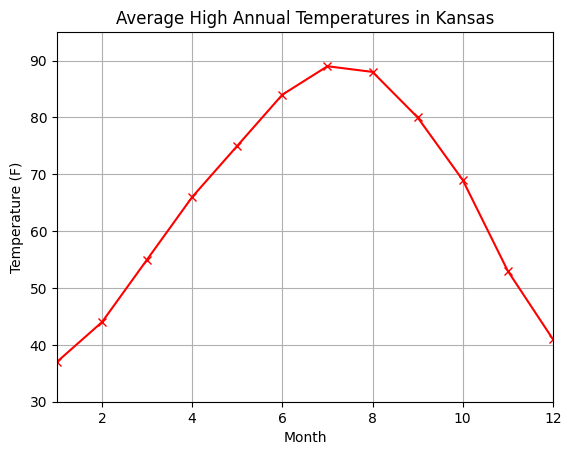

In [ ]:
#1
WeatherHigh = np.array([37, 44, 55, 66, 75, 84, 89, 88, 80, 69, 53, 41])

plt.figure()
plt.plot(range(1, 13), WeatherHigh, 'r-x')
plt.axis([1, 12, 30, 95])
plt.title('Average High Annual Temperatures in Kansas')
plt.xlabel('Month')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.show()


In [ ]:
#2

x = np.array([1, 5, 8, 12])
V = np.vander(x, increasing=True)

y = WeatherHigh[[0, 4, 7, 11]]

CoefHigh = lstsq(V, y, rcond=None)[0]
x = np.array([1, 5, 8, 12])
y = WeatherHigh[x-1]  

V = np.vander(x, increasing=True)

CoefHigh = np.linalg.solve(V, y)

print("Vandermonde Matrix (V):")
print(V)
print("Coefficients of the cubic polynomial (CoefHigh):")
print(CoefHigh)

print("Coefficients of the cubic polynomial:", CoefHigh)


Vandermonde Matrix (V):
[[   1    1    1    1]
 [   1    5   25  125]
 [   1    8   64  512]
 [   1   12  144 1728]]
Coefficients of the cubic polynomial (CoefHigh):
[29.48051948  6.41450216  1.24675325 -0.14177489]
Coefficients of the cubic polynomial: [29.48051948  6.41450216  1.24675325 -0.14177489]


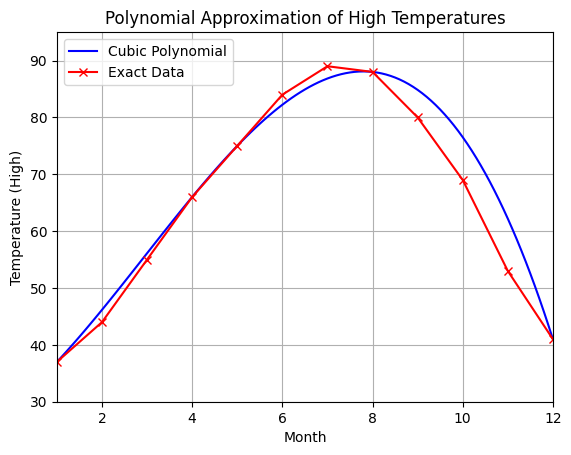

In [ ]:
#3

xc = np.arange(1, 12.1, 0.1)
ycHigh = np.polyval(CoefHigh[::-1], xc) 

plt.figure()
plt.plot(xc, ycHigh, 'b-', label='Cubic Polynomial')
plt.plot(range(1, 13), WeatherHigh, 'r-x', label='Exact Data')
plt.axis([1, 12, 30, 95])
plt.xlabel('Month')
plt.ylabel('Temperature (High)')
plt.title('Polynomial Approximation of High Temperatures')
plt.legend()
plt.grid(True)
plt.show()

Vandermonde Matrix for six months (V_six):
[[     1      1      1      1      1      1]
 [     1      3      9     27     81    243]
 [     1      5     25    125    625   3125]
 [     1      8     64    512   4096  32768]
 [     1     10    100   1000  10000 100000]
 [     1     12    144   1728  20736 248832]]
Coefficients of the 5th degree polynomial (CoefHigh_six):
[ 2.51341991e+01  1.49771284e+01 -4.19289322e+00  1.21778499e+00
 -1.41305916e-01  5.08658009e-03]


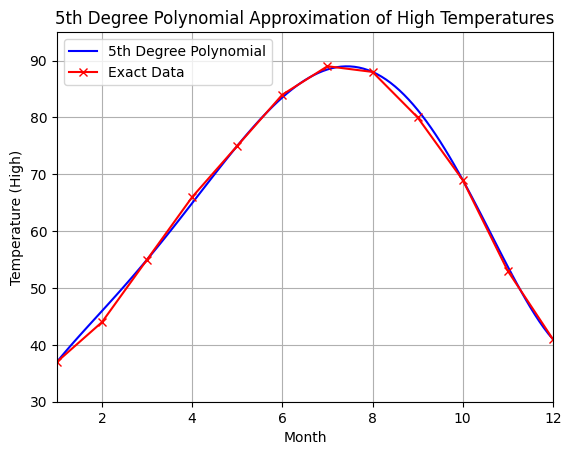

In [ ]:
#4

x_six = np.array([1, 3, 5, 8, 10, 12])
y_six = WeatherHigh[x_six - 1] 

V_six = np.vander(x_six, increasing=True)
CoefHigh_six = np.linalg.solve(V_six, y_six)

print("Vandermonde Matrix for six months (V_six):")
print(V_six)
print("Coefficients of the 5th degree polynomial (CoefHigh_six):")
print(CoefHigh_six)

ycHigh_six = np.polyval(CoefHigh_six[::-1], xc)  

plt.figure()
plt.plot(xc, ycHigh_six, 'b-', label='5th Degree Polynomial')
plt.plot(range(1, 13), WeatherHigh, 'r-x', label='Exact Data')
plt.axis([1, 12, 30, 95])
plt.xlabel('Month')
plt.ylabel('Temperature (High)')
plt.title('5th Degree Polynomial Approximation of High Temperatures')
plt.legend()
plt.grid(True)
plt.show()


Vandermonde Matrix for all twelve months (V_all):
[[           1            1            1            1            1
             1            1            1            1            1
             1            1]
 [           1            2            4            8           16
            32           64          128          256          512
          1024         2048]
 [           1            3            9           27           81
           243          729         2187         6561        19683
         59049       177147]
 [           1            4           16           64          256
          1024         4096        16384        65536       262144
       1048576      4194304]
 [           1            5           25          125          625
          3125        15625        78125       390625      1953125
       9765625     48828125]
 [           1            6           36          216         1296
          7776        46656       279936      1679616     10077696
 

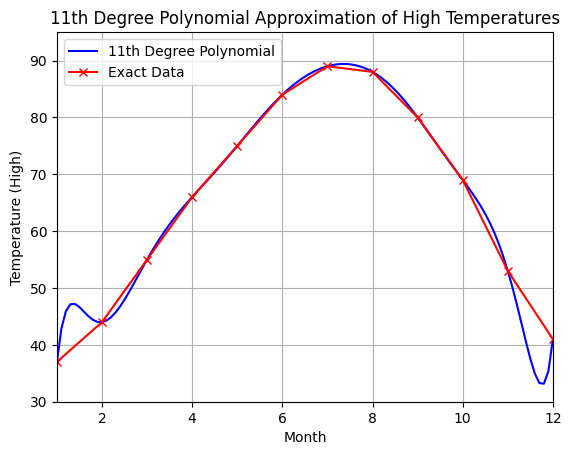

In [ ]:
#5

x_all = np.arange(1, 13)
y_all = WeatherHigh

V_all = np.vander(x_all, increasing=True)

CoefHigh_all = np.linalg.solve(V_all, y_all)

print("Vandermonde Matrix for all twelve months (V_all):")
print(V_all)
print("Coefficients of the 11th degree polynomial (CoefHigh_all):")
print(CoefHigh_all)

ycHigh_all = np.polyval(CoefHigh_all[::-1], xc) 

plt.figure()
plt.plot(xc, ycHigh_all, 'b-', label='11th Degree Polynomial')
plt.plot(range(1, 13), WeatherHigh, 'r-x', label='Exact Data')
plt.axis([1, 12, 30, 95])
plt.xlabel('Month')
plt.ylabel('Temperature (High)')
plt.title('11th Degree Polynomial Approximation of High Temperatures')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
import scipy.io
from scipy.io import loadmat

data = scipy.io.loadmat('temperature.mat')
temperature = data['temperature']

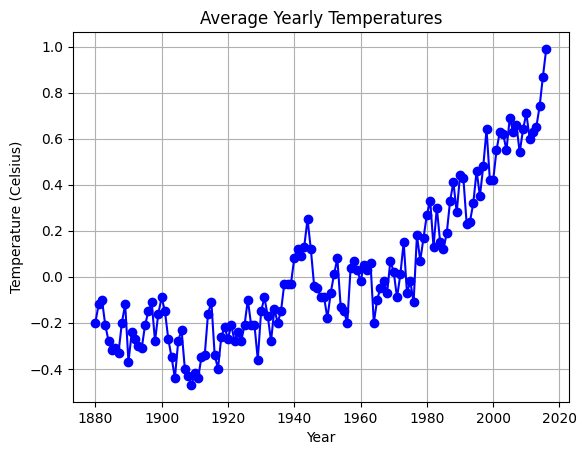

In [ ]:
#8
import matplotlib.pyplot as plt
years = temperature[:, 0]
temp = temperature[:, 1]

plt.figure()
plt.plot(years, temp, 'b-o')
plt.xlabel('Year')
plt.ylabel('Temperature (Celsius)')
plt.title('Average Yearly Temperatures')
plt.grid(True)
plt.show()

In [ ]:
#10,11,12,13

import numpy as np
average_temp = np.mean(temp)

print(f"The average temperature for the past 136 years was {average_temp:.4f}°C.")

n = len(temp)
b1 = np.ones(n)
P1 = np.outer(b1, b1) / np.dot(b1, b1)
temp1 = P1 @ 
print("Projection matrix P1:")
print(P1)
print("Projected temperatures (temp1):")
print(temp1)

plt.figure()
plt.plot(years, temp, 'bo', label='Original Data')
plt.plot(years, temp1, 'g.', label='Projected Data')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Temperature Data Projection')
plt.legend()
plt.grid(True)
plt.show()

SyntaxError: invalid syntax (1421041985.py, line 11)

In [ ]:

#14
import numpy as np
norm_P1 = np.linalg.norm(P1 @ P1 - P1)
print(f"norm(P1 * P1 - P1) = {norm_P1:.4e}")


In [3]:
#15

from scipy.linalg import orth
m = len(years)
B2 = np.column_stack((np.ones(m), years))
Q2 = orth(B2)

rank_Q2 = np.linalg.matrix_rank(Q2)
rank_Q2_B2 = np.linalg.matrix_rank(np.column_stack((Q2, B2)))

print(f"Rank of Q2: {rank_Q2}")
print(f"Rank of [Q2, B2]: {rank_Q2_B2}")

Q2_T_Q2 = np.dot(Q2.T, Q2)
print("Q2.T @ Q2:")
print(Q2_T_Q2)



NameError: name 'years' is not defined

In [4]:
#16

import matplotlib.pyplot as plt
P2 = Q2 @ Q2.T

temp2 = P2 @ temp
plt.figure()
plt.plot(years, temp, 'bo', label='Original Data')
plt.plot(years, temp1, 'g.', label='Constant Approximation')
plt.plot(years, temp2, 'r.', label='Linear Approximation')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Temperature Data Projection')
plt.legend()
plt.grid(True)
plt.show()

print("Projected temperatures (temp2):")
print(temp2)

norm_P2 = np.linalg.norm(P2 @ P2 - P2)
print(f"norm(P2 * P2 - P2) = {norm_P2:.4e}")


NameError: name 'Q2' is not defined

In [6]:
#17,18

import matplotlib.pyplot as plt 
B3 = np.column_stack((np.ones(m), years, years**2))

Q3 = np.linalg.qr(B3)[0] 

P3 = Q3 @ Q3.T

temp3 = P3 @ temp

plt.figure()
plt.plot(years, temp, 'bo', label='Original Data')
plt.plot(years, temp1, 'g.', label='Constant Approximation')
plt.plot(years, temp2, 'r.', label='Linear Approximation')
plt.plot(years, temp3, 'm.', label='Quadratic Approximation')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Temperature Data Projection')
plt.legend()
plt.grid(True)
plt.show()

print("Projected temperatures (temp3):")
print(temp3)

norm_P3 = np.linalg.norm(P3 @ P3 - P3)
print(f"norm(P3 * P3 - P3) = {norm_P3:.4e}")


NameError: name 'm' is not defined

In [5]:
#19
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

futureyears = np.arange(2016, 2117)

interp_func = interp1d(years, temp3, kind='cubic', fill_value='extrapolate')
futuretemp3 = interp_func(futureyears)

plt.figure()

plt.plot(futureyears, futuretemp3, 'g-')
plt.xlabel('Year')
plt.ylabel('Predicted Average Temperature (°C)')
plt.title('Predicted Average Temperature for Next 100 Years')
plt.grid()

print(f'Predicted average temperature for the year 2116: {futuretemp3[-1]:.2f} °C')

plt.show()

NameError: name 'years' is not defined